In [1]:
import pyaudio
# imports
import matplotlib.pyplot as plt
import numpy as np
import wave, sys
import wave
import librosa # this is the cooler way to plot the sound
import librosa.display

In [2]:
filename = "recorded.wav"
chunk = 1024
FORMAT = pyaudio.paInt16
channels = 1 # this would change to 2 channels later
sample_rate = 44100
record_seconds = .5

In [3]:
p = pyaudio.PyAudio()
stream = p.open( format=FORMAT,
channels=channels,
rate=sample_rate,
input=True,
output=True,
frames_per_buffer=chunk)

#record audio
frames = []
print("started recording")
for i in range(int(sample_rate /chunk * record_seconds)):
    data = stream.read(chunk)
    frames.append(data)
print("stop")
stream.stop_stream()
stream.close()
p.terminate()

#save to .wav file
wf = wave.open(filename, "wb")
wf.setnchannels(channels)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(sample_rate)
wf.writeframes(b"".join(frames))
wf.close()

started recording
stop


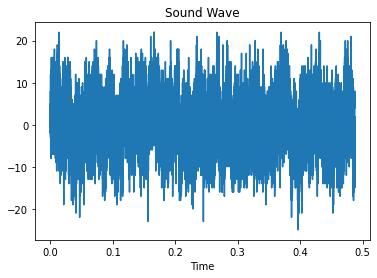

In [4]:
# shows the sound waves
def visualize(path: str):

	# reading the audio file
	raw = wave.open(path)
	
	# reads all the frames
	# -1 indicates all or max frames
	signal = raw.readframes(-1)
	signal = np.frombuffer(signal, dtype ="int16")
	
	# gets the frame rate
	f_rate = raw.getframerate()

	# to Plot the x-axis in seconds
	# you need get the frame rate
	# and divide by size of your signal
	# to create a Time Vector
	# spaced linearly with the size
	# of the audio file
	time = np.linspace(
		0, # start
		len(signal) / f_rate,
		num = len(signal)
	)

	# using matplotlib to plot
	# creates a new figure
	plt.figure(1)
	
	# title of the plot
	plt.title("Sound Wave")
	
	# label of x-axis
	plt.xlabel("Time")
	
	# actual plotting
	plt.plot(time, signal)
	
	# shows the plot
	# in new window
	plt.show()

	# you can also save
	# the plot using
	# plt.savefig('filename')
visualize(filename)


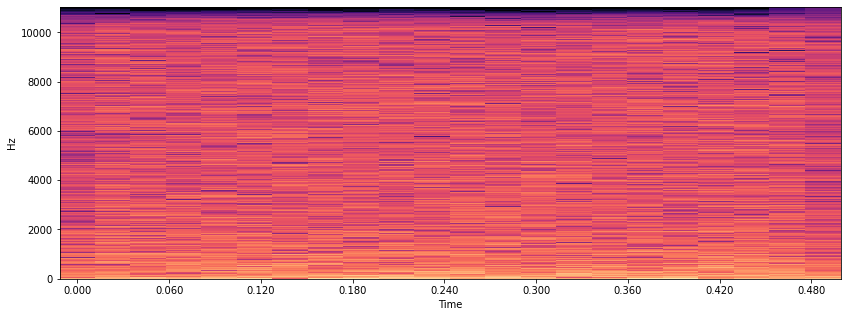

In [5]:
# when this is usually the way people in industry look at the sound waves this is a Fouer transorm view
x, sr = librosa.load(filename)
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

In [ ]:
x, sr = librosa.load(filename)
wav_roll = np.roll(x,int(sample_rate/10))
X = librosa.stft(wav_roll)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
#audio_data = [x- time_shift for x in audio_data]